In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
NUMBER_OF_BINS = 10
NUMBER_OF_SAMPLES = 1000000

In [8]:
from typing import List, Tuple

for upper in range(20, 1001):
    lower = 19
    bin_size = (upper - lower + 1) / NUMBER_OF_BINS
    bins = np.zeros(NUMBER_OF_BINS)
    map_to_bin: List[List[Tuple[int, float]]] = [[] for _ in range(lower, upper + 1)]
    for i in range(lower, upper + 1):
        value_lower = i - lower
        value_upper = value_lower + 1

        start_bin = int(value_lower // bin_size)
        end_bin = int(value_upper // bin_size)

        if start_bin == end_bin:
            # If the value fits entirely within one bin
            map_to_bin[i - lower].append((start_bin, 1))
        else:
            # If the value crosses into two or more bins, compute the fractions
            for j in range(start_bin, end_bin + 1):
                bin_start = j * bin_size
                bin_end = (j + 1) * bin_size

                # Fraction of the current value in bin j
                overlap_start = max(value_lower, bin_start)
                overlap_end = min(value_upper, bin_end)

                fraction = (overlap_end - overlap_start)
                if fraction > 0:
                    map_to_bin[i - lower].append((j, fraction))

    assert sum([fraction for i in range(lower, upper + 1) for _, fraction in map_to_bin[i - lower]]) == upper - lower + 1

    for i in range(lower, upper + 1):
        for j, fraction in map_to_bin[i - lower]:
            bins[j] += fraction

    assert all([np.isclose(bins[i], bins[0]) for i in range(NUMBER_OF_BINS)])

999999.9999992559


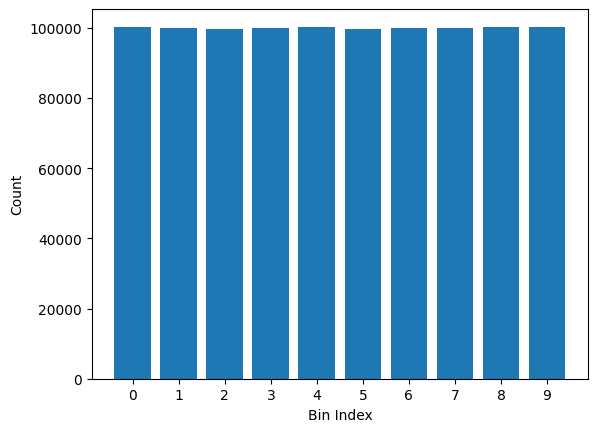

In [71]:
def map_to_bin(lower: int, upper: int) -> List[List[Tuple[int, float]]]:
    bin_size = (upper - lower + 1) / NUMBER_OF_BINS
    map_to_bin: List[List[Tuple[int, float]]] = [[] for _ in range(lower, upper + 1)]
    for i in range(lower, upper + 1):
        value_lower = i - lower
        value_upper = value_lower + 1

        # Find the bin j such that bin_size * (j-1) <= value_lower < bin_size * j
        start_bin = int(value_lower // bin_size)
        end_bin = int(value_upper // bin_size)

        # If the entire interval [value_lower, value_upper] fits within one bin
        if start_bin == end_bin:
            # If the value fits entirely within one bin
            map_to_bin[i - lower].append((start_bin, 1))
        else:
            # If the value crosses into two or more bins, compute the fractions
            for j in range(start_bin, end_bin + 1):
                bin_start = j * bin_size
                bin_end = (j + 1) * bin_size

                # Fraction of the current value in bin j
                overlap_start = max(value_lower, bin_start)
                overlap_end = min(value_upper, bin_end)

                fraction = (overlap_end - overlap_start)
                if fraction > 0:
                    map_to_bin[i - lower].append((j, fraction))

    assert sum([fraction for i in range(lower, upper + 1) for _, fraction in map_to_bin[i - lower]]) == upper - lower + 1
    return map_to_bin

lower = 1
upper = 6
random.seed(42)
value_list = [random.randint(lower, upper) for _ in range(NUMBER_OF_SAMPLES)]

map_to_bin_list = map_to_bin(lower, upper)
bins = np.zeros(NUMBER_OF_BINS)
for v in value_list:
    for j, fraction in map_to_bin_list[v - lower]:
        bins[j] += fraction

assert np.isclose(sum(bins), len(value_list))
print(sum(bins))

fig, ax = plt.subplots()
ax.bar(list(range(NUMBER_OF_BINS)), bins)
ax.set_xticks(list(range(NUMBER_OF_BINS)))
ax.set_xlabel("Bin Index")
ax.set_ylabel("Count")

plt.show()

In [15]:
import numpy as np

# Global number of bins
NUMBER_OF_BINS = 10

def map_values_to_nd_bins(matrix):
    """
    This function will map values of an n-dimensional matrix to bins across all dimensions.
    
    Args:
    - matrix: The n-dimensional matrix to be processed.
    
    Returns:
    - A list of lists where each inner list contains tuples of the form (dimension, (bin_index, fraction)) 
      to differentiate which dimension's bin is being referred to.
    """
    shape = matrix.shape
    num_dims = len(shape)

    # Calculate the bin size for each dimension based on NUMBER_OF_BINS
    bin_sizes = [dim_size / NUMBER_OF_BINS for dim_size in shape]
    
    # Create an empty map for each dimension based on the bin size
    map_to_bins = np.empty(shape, dtype=object)
    for idx, _ in np.ndenumerate(matrix):
        map_to_bins[idx] = []

        # Calculate the bin indices and fractions for each dimension
        for dim in range(num_dims):
            lower_bound = idx[dim]
            upper_bound = lower_bound + 1
            
            bin_size = bin_sizes[dim]
            start_bin = int(lower_bound // bin_size)
            end_bin = int(upper_bound // bin_size)
            
            if start_bin == end_bin:
                # Fits entirely in one bin
                map_to_bins[idx].append((dim, (start_bin, 1)))
            else:
                # Spans across multiple bins, calculate fractions
                for bin_idx in range(start_bin, end_bin + 1):
                    bin_start = bin_idx * bin_size
                    bin_end = (bin_idx + 1) * bin_size
                    
                    overlap_start = max(lower_bound, bin_start)
                    overlap_end = min(upper_bound, bin_end)
                    
                    fraction = (overlap_end - overlap_start) / (upper_bound - lower_bound)
                    if fraction > 0:
                        map_to_bins[idx].append((dim, (bin_idx, fraction)))
    
    return map_to_bins

# Example test for a 2D matrix
matrix_2d = np.zeros((28, 6))

# Test the n-dimensional binning with the global NUMBER_OF_BINS
map_to_bins_result = map_values_to_nd_bins(matrix_2d)

# Display the results
for idx, bins in np.ndenumerate(map_to_bins_result):
    print(f"Matrix index {idx} is mapped to bins: {bins}")

Matrix index (0, 0) is mapped to bins: [(0, (0, 1)), (1, (0, 0.6)), (1, (1, 0.4))]
Matrix index (0, 1) is mapped to bins: [(0, (0, 1)), (1, (1, 0.19999999999999996)), (1, (2, 0.5999999999999999)), (1, (3, 0.20000000000000018))]
Matrix index (0, 2) is mapped to bins: [(0, (0, 1)), (1, (3, 0.3999999999999999)), (1, (4, 0.6000000000000001))]
Matrix index (0, 3) is mapped to bins: [(0, (0, 1)), (1, (5, 0.5999999999999996)), (1, (6, 0.40000000000000036))]
Matrix index (0, 4) is mapped to bins: [(0, (0, 1)), (1, (6, 0.20000000000000018)), (1, (7, 0.5999999999999996)), (1, (8, 0.20000000000000018))]
Matrix index (0, 5) is mapped to bins: [(0, (0, 1)), (1, (8, 0.39999999999999947)), (1, (9, 0.6000000000000005))]
Matrix index (1, 0) is mapped to bins: [(0, (0, 1)), (1, (0, 0.6)), (1, (1, 0.4))]
Matrix index (1, 1) is mapped to bins: [(0, (0, 1)), (1, (1, 0.19999999999999996)), (1, (2, 0.5999999999999999)), (1, (3, 0.20000000000000018))]
Matrix index (1, 2) is mapped to bins: [(0, (0, 1)), (1, (